### Step1 - Data Description and Objective.
- The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). 
- The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills.
- The objective of this dataset is, it is providing you the entire detailed employability feedback with suggested resources for improving your skills and increase your chance of getting jobs.

#### Importing all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import uniform

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


### Step2 - Reading excel dataset.

In [3]:
file = "aspiring_minds_employability_outcomes_2015.xlsx"
df = pd.read_excel(file)
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


- shape of a dataframe.

In [4]:
df.shape

(3998, 39)

- Information of the DataFrame.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

- Converting the datatypes.

In [6]:
df['ID'] = df['ID'].astype('object')
df['12graduation'] = df['12graduation'].astype('object')
df['CollegeID'] = df['CollegeID'].astype('object')
df['CollegeTier'] = df['CollegeTier'].astype('object')
df['CollegeCityID'] = df['CollegeCityID'].astype('object')
df['CollegeCityTier'] = df['CollegeCityTier'].astype('object')
df['GraduationYear'] = df['GraduationYear'].astype('object')

- Dropping unnecessaary columns.

In [7]:
df.drop(['ID'],axis=1,inplace = True)
df.drop(['CollegeID'],axis=1,inplace = True)
df.drop(['CollegeCityID'],axis=1,inplace = True)
df.drop(['DOB'],axis=1,inplace = True)
df.drop(['Unnamed: 0'],axis=1,inplace = True)

- Replacing the `present` in `DOL column` to `DateTime format.`

In [8]:
df['DOL'].unique()

array(['present', datetime.datetime(2015, 3, 1, 0, 0),
       datetime.datetime(2015, 5, 1, 0, 0),
       datetime.datetime(2015, 7, 1, 0, 0),
       datetime.datetime(2015, 4, 1, 0, 0),
       datetime.datetime(2014, 10, 1, 0, 0),
       datetime.datetime(2014, 9, 1, 0, 0),
       datetime.datetime(2014, 6, 1, 0, 0),
       datetime.datetime(2012, 9, 1, 0, 0),
       datetime.datetime(2013, 12, 1, 0, 0),
       datetime.datetime(2015, 6, 1, 0, 0),
       datetime.datetime(2013, 10, 1, 0, 0),
       datetime.datetime(2015, 1, 1, 0, 0),
       datetime.datetime(2014, 4, 1, 0, 0),
       datetime.datetime(2013, 6, 1, 0, 0),
       datetime.datetime(2012, 3, 1, 0, 0),
       datetime.datetime(2014, 7, 1, 0, 0),
       datetime.datetime(2013, 2, 1, 0, 0),
       datetime.datetime(2014, 1, 1, 0, 0),
       datetime.datetime(2013, 4, 1, 0, 0),
       datetime.datetime(2012, 7, 1, 0, 0),
       datetime.datetime(2014, 5, 1, 0, 0),
       datetime.datetime(2013, 9, 1, 0, 0),
       datetime.da

In [9]:
from datetime import date
date1 = date.today()
date1.strftime("%d %m %y")
df['DOL'].replace(['present'],date.today(),inplace = True)
df['DOL'].replace(['2015,13,1,0,0'],date.today(),inplace = True)
df['DOL'] = pd.to_datetime(df['DOL']) #"present"

In [10]:
df['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 0, 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'mat

In [11]:
df['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', -1, 'mohali',
       'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida', 'delhi',
       'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore',
       'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon', '

In [12]:
df['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta

- Replacing values.

In [13]:
df['10board'].replace([0],['Data Unavailable'],inplace = True)
df['JobCity'].replace([-1],['Data Unavailable'],inplace = True)
df['12board'].replace([0],['Data Unavailable'],inplace = True)

- Statistical description of a dataframe.

In [14]:
df.describe()

,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.076998e+05,77.925443,74.466366,71.486171,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,2.127375e+05,9.850162,10.999933,8.167338,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,3.500000e+04,43.000000,40.000000,6.450000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,71.680000,66.000000,66.407500,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,79.150000,74.400000,71.720000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,3.700000e+05,85.670000,82.600000,76.327500,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,97.760000,98.700000,99.930000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   datetime64[ns]
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   10percentage           3998 non-null   float64       
 7   10board                3998 non-null   object        
 8   12graduation           3998 non-null   object        
 9   12percentage           3998 non-null   float64       
 10  12board                3998 non-null   object        
 11  CollegeTier            3998 non-null   object        
 12  Degree                 3998 non-null   object        
 13  Spe

In [16]:
df.isnull().sum()

Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

In [17]:
df.head(3)

,Salary,DOJ,DOL,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2021-06-05,senior quality engineer,Bangalore,f,84.3,"board ofsecondary education,ap",2007,95.8,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455
1,500000,2013-09-01,2021-06-05,assistant manager,Indore,m,85.4,cbse,2007,85.0,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637
2,325000,2014-06-01,2021-06-05,systems engineer,Chennai,f,85.0,cbse,2010,68.2,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.8682,0.6721


### Step3 : Univariate Analysis.

### 1) Finding the outliers in each numerical column.

- Outliers - Outlier is an observation that is numerically distant from the rest of the data or in a simple word it is the value which is out of the range or it has extremely high or low values.

`DIFFERENT OUTLIER DETECTION TECHNIQUES:`
- Z-Score.
- IQR.
- Visualization Methods.
- Hypothesis Testing.

##### a) Z-Score  
- Using Z-Score method, we can find out the `distance of a point from the mean with respect to standard deviation.`  
`Z score = (Observation — Mean)/Standard Deviation`    
`Z* or Z-Score = (X — μ) / σ`  

- Number of Outliers present for different columns regarding float datatype.

In [18]:
num_cols = [col for col in df.columns if df[col].dtypes == 'float64']
num_cols
def zscore_outlier(df,col):
    mean = df[col].mean()
    std = df[col].std()
    threshold = 3
    outlier = [] 
    for i in df[col]: 
        z = (i-mean)/std
        if z > threshold: 
            outlier.append(i)
    print('Column name is :',col)
    print('Number of outliers in dataset is', len(outlier))
    return '*****************************************************'
for i in num_cols:
    print(zscore_outlier(df,i))

Column name is : 10percentage
Number of outliers in dataset is 0
*****************************************************
Column name is : 12percentage
Number of outliers in dataset is 0
*****************************************************
Column name is : collegeGPA
Number of outliers in dataset is 7
*****************************************************
Column name is : Domain
Number of outliers in dataset is 0
*****************************************************
Column name is : conscientiousness
Number of outliers in dataset is 0
*****************************************************
Column name is : agreeableness
Number of outliers in dataset is 0
*****************************************************
Column name is : extraversion
Number of outliers in dataset is 0
*****************************************************
Column name is : nueroticism
Number of outliers in dataset is 8
*****************************************************
Column name is : openess_to_experience
Number of ou

#### Observation  
The above program gives you the number of outliers for columns representing float datatype.

- Number of outliers present for different columns regarding integer datatype.

In [19]:
num_cols = [col for col in df.columns if df[col].dtypes == 'int64']
num_cols
def zscore_outlier(df,col):
    mean = df[col].mean()
    std = df[col].std()
    threshold = 3
    outlier = [] 
    for i in df[col]: 
        z = (i-mean)/std
        if z > threshold: 
            outlier.append(i)
    print('Column name is :',col)
    print('Number of outliers in dataset is', len(outlier))
    return '*****************************************************'
for i in num_cols:
    print(zscore_outlier(df,i))

Column name is : Salary
Number of outliers in dataset is 40
*****************************************************
Column name is : English
Number of outliers in dataset is 5
*****************************************************
Column name is : Logical
Number of outliers in dataset is 1
*****************************************************
Column name is : Quant
Number of outliers in dataset is 4
*****************************************************
Column name is : ComputerProgramming
Number of outliers in dataset is 0
*****************************************************
Column name is : ElectronicsAndSemicon
Number of outliers in dataset is 2
*****************************************************
Column name is : ComputerScience
Number of outliers in dataset is 22
*****************************************************
Column name is : MechanicalEngg
Number of outliers in dataset is 197
*****************************************************
Column name is : ElectricalEngg
Number of outl

#### Observation  
The above program gives you the number of outliers for columns representing integer datatype.

##### b) Using IQR
- In this method by using Inter Quartile Range(IQR), we detect outliers. IQR tells us the variation in the data set.Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR are treated as outliers.

- Q1 represents the 1st quartile/25th percentile of the data.  
  Q2 represents the 2nd quartile/median/50th percentile of the data.  
  Q3 represents the 3rd quartile/75th percentile of the data.  
  (Q1–1.5*IQR) represent the smallest value in the data set and (Q3+1.5*IQR) represent the largest value in the data set.

- Detecting Outliers using IQR method for integer datatype.

In [20]:
def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('Variable name is :',col)
    print('IQR is ',IQR)
    l_bound = Q1-(1.5*IQR)
    u_bound = Q3+(1.5*IQR)
    print('Lower_Bound',l_bound)
    print('Upper_Bound',u_bound)
    outlier = [val for val in df[col] if val < l_bound or val > u_bound]
    #print('Outliers are :',outlier)
    print('number  of Outliers are :',len(outlier))
    return '************************************************************'
for i in num_cols:
    print(outliers(df,i))

Variable name is : Salary
IQR is  190000.0
Lower_Bound -105000.0
Upper_Bound 655000.0
number  of Outliers are : 109
************************************************************
Variable name is : English
IQR is  145.0
Lower_Bound 207.5
Upper_Bound 787.5
number  of Outliers are : 15
************************************************************
Variable name is : Logical
IQR is  120.0
Lower_Bound 265.0
Upper_Bound 745.0
number  of Outliers are : 18
************************************************************
Variable name is : Quant
IQR is  165.0
Lower_Bound 182.5
Upper_Bound 842.5
number  of Outliers are : 25
************************************************************
Variable name is : ComputerProgramming
IQR is  200.0
Lower_Bound -5.0
Upper_Bound 795.0
number  of Outliers are : 2
************************************************************
Variable name is : ElectronicsAndSemicon
IQR is  234.0
Lower_Bound -352.0
Upper_Bound 584.0
number  of Outliers are : 2
***************************

- Detecting Outliers using IQR method for float datatype.

In [21]:
num_cols = [col for col in df.columns if df[col].dtypes == 'float64']
num_cols
def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('Variable name is :',col)
    print('IQR is ',IQR)
    l_bound = Q1-(1.5*IQR)
    u_bound = Q3+(1.5*IQR)
    print('Lower_Bound',l_bound)
    print('Upper_Bound',u_bound)
    outlier = [val for val in df[col] if val < l_bound or val > u_bound]
    #print('Outliers are :',outlier)
    print('number  of Outliers are :',len(outlier))
    return '************************************************************'
for i in num_cols:
    print(outliers(df,i))

Variable name is : 10percentage
IQR is  13.990000000000009
Lower_Bound 50.69499999999998
Upper_Bound 106.65500000000002
number  of Outliers are : 30
************************************************************
Variable name is : 12percentage
IQR is  16.599999999999994
Lower_Bound 41.10000000000001
Upper_Bound 107.49999999999999
number  of Outliers are : 1
************************************************************
Variable name is : collegeGPA
IQR is  9.920000000000002
Lower_Bound 51.527499999999996
Upper_Bound 91.20750000000001
number  of Outliers are : 38
************************************************************
Variable name is : Domain
IQR is  0.49993342234602095
Lower_Bound -0.4075852336072164
Upper_Bound 1.5921484557768673
number  of Outliers are : 246
************************************************************
Variable name is : conscientiousness
IQR is  1.416225
Lower_Bound -2.8378625000000004
Upper_Bound 2.8270375000000003
number  of Outliers are : 39
********************

- IQR for all the numerical columns

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Salary                   190000.000000
10percentage                 13.990000
12percentage                 16.600000
collegeGPA                    9.920000
English                     145.000000
Logical                     120.000000
Quant                       165.000000
Domain                        0.499933
ComputerProgramming         200.000000
ElectronicsAndSemicon       234.000000
ComputerScience               0.000000
MechanicalEngg                0.000000
ElectricalEngg                0.000000
TelecomEngg                   0.000000
CivilEngg                     0.000000
conscientiousness             1.416225
agreeableness                 1.099900
extraversion                  1.276800
nueroticism                   1.394400
openess_to_experience         1.171600
dtype: float64


##### c) Visualizing the data.
- Data visualization is useful for data cleaning, data exploration, detecting outliers, identifying trends etc.  
`The list of data visualization plots to spot the outliers:`  
1. Box and whisker plot (box plot).
2. Scatter plot.
3. Histogram.
4. Distribution Plot.
5. QQ plot.

In [23]:
import warnings
warnings.filterwarnings("ignore")

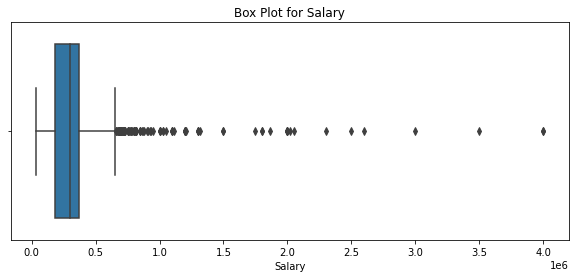

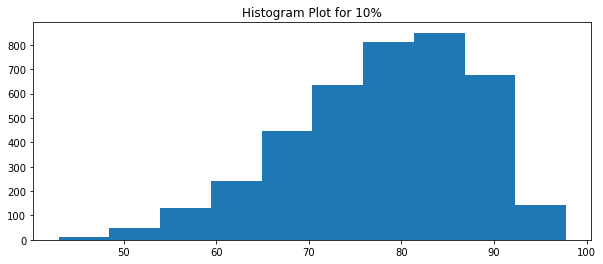

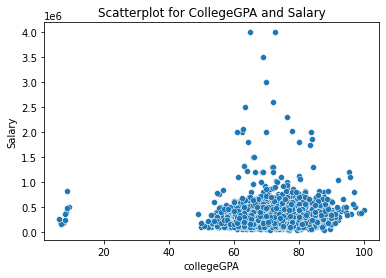

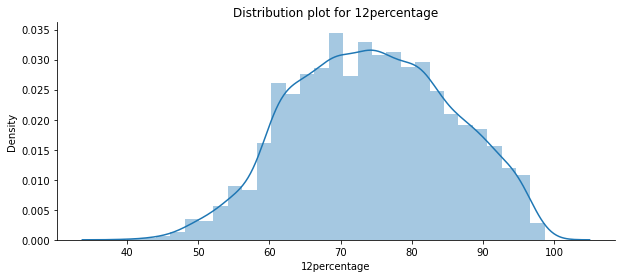

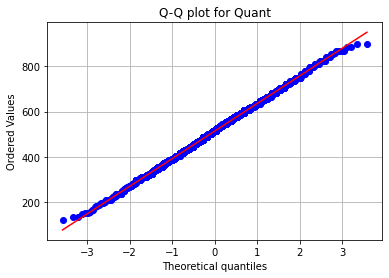

In [24]:
# figure1 Boxplot for Salary.
def Box_plots(data):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot for Salary")
    sns.boxplot(data)
    plt.show()
Box_plots(df['Salary'])

# figure2 histogram for 10percentage.
def hist_plots(data):
    plt.figure(figsize=(10, 4))
    plt.hist(data)
    plt.title("Histogram Plot for 10%")
    plt.show()
hist_plots(df['10percentage'])

# figure3 Scatterplot for CollegeGPA and Salary.
plt.title("Scatterplot for CollegeGPA and Salary")
sns.scatterplot(x='collegeGPA', y='Salary', data=df);

# figure4 distribution plot for 12percentage.
def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot for 12percentage")
    sns.despine()
    plt.show()
dist_plots(df['12percentage'])

# figure5 Q-Q plot for Quant.
stats.probplot(df['Quant'], dist="norm", plot=plt)
plt.title("Q-Q plot for Quant")
plt.grid()

#### Observation  
- From the boxplot regarding Salary we can say that there are extremely high outliers present in the data.
- For histogram of 10percentage, we can say that it has extremely low outliers as it is skewed to the left.
- From the scatterplot regarding CollegeGPA and Salary we can say that most of them are having 60% to 80% and the percentage is independent on salary. 
- From the distribution plot regarding 12percentage, we can say that it has outliers towards the left i.e., it is skewed towards the left or negatively skewed.
- From the Q-Q plot regarding Quant, we can say that it has some outliers, but it is normally distributed to some extent.

In [25]:
# The highest salary in the data.

df[df['Salary']==df['Salary'].max()]


,Salary,DOJ,DOL,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
1237,4000000,2010-07-01,2015-03-01,senior software engineer,New Delhi,m,90.83,rbse,2005,88.77,...,-1,-1,-1,-1,-1,-0.7264,0.0328,-1.6502,-0.8778,-0.1295
2182,4000000,2010-01-01,2011-12-01,automation engineer,gurgaon,m,53.00,up bord,2004,61.00,...,-1,-1,-1,-1,-1,-3.3539,-0.4353,-1.0697,-0.0552,-2.6572


### Observation  
The highest salary is found to be `4000000/-`

In [26]:
# The lowest salary in the data.

df[df['Salary']==df['Salary'].min()]

,Salary,DOJ,DOL,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
194,35000,2012-01-01,2021-06-05,systems engineer,Gurgaon,f,86.0,Data Unavailable,2007,75.2,...,-1,-1,-1,-1,-1,-2.5811,0.0328,0.3817,0.4148,-1.0774
2627,35000,2012-03-01,2021-06-05,systems engineer,Noida,m,88.0,icse,2007,80.4,...,-1,-1,-1,-1,-1,0.2009,0.0328,-0.9245,0.2973,-0.1295
3473,35000,2014-05-01,2015-05-01,.net developer,hyderabad,m,85.3,state board,2010,85.4,...,376,-1,-1,-1,-1,-3.7496,-5.6151,-3.8324,-0.4879,-7.3757


### Observation  
The lowest salary is found to be `35000/-`

#### 2) Probability and Frequency Distributions for each numerical columns.

- Probability and frequency distributions for numerical columns.

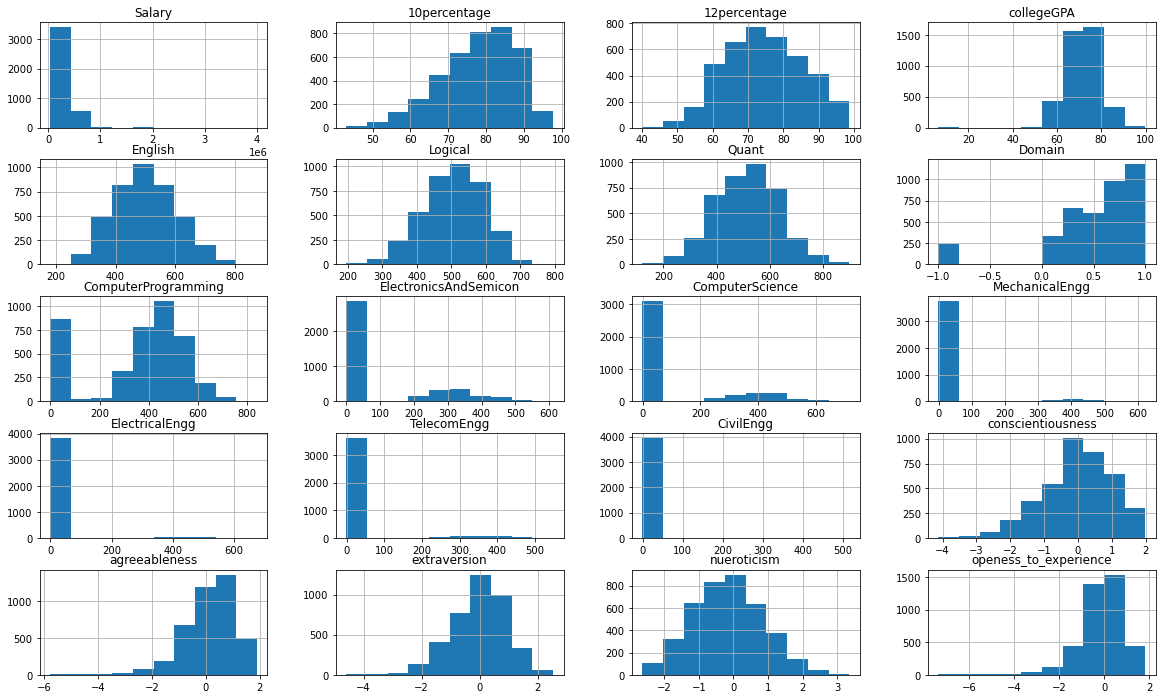

In [27]:
numerical_columns = df.select_dtypes(include=['int64','float64'])
numerical_columns.hist(figsize = (20,12))
plt.show()

#### Observation  
From the above plot we can see the probability and frequency distribution of each numerical plot.

- 10percentage

mean 77.9254427213606 standard deviation 9.850162410652587


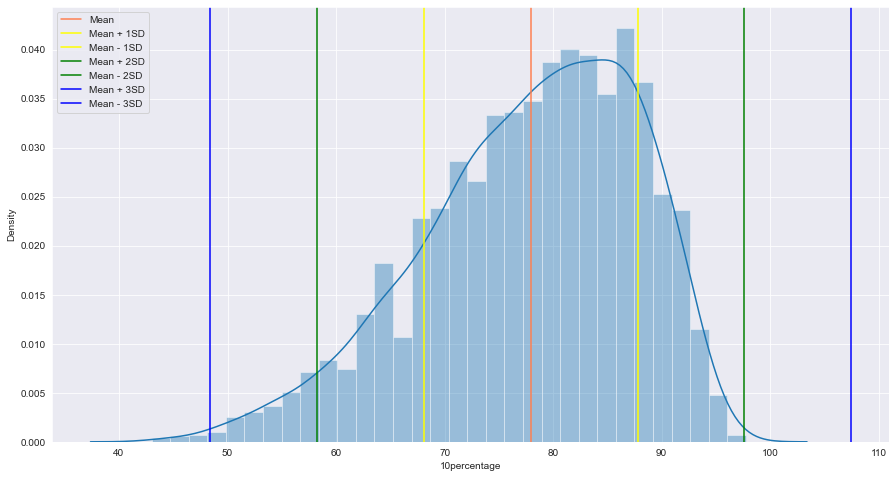

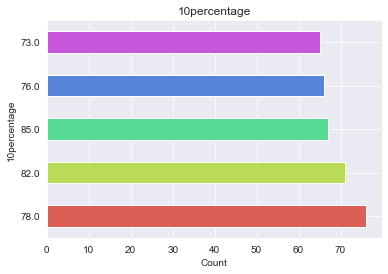

In [28]:
# probability and frequency using distributionplot.
mu_normal = df['10percentage'].mean()
sigma_normal = df['10percentage'].std()

print('mean',mu_normal, 'standard deviation',sigma_normal)
one_std_right = mu_normal + (1 * sigma_normal)

one_std_left = mu_normal - (1 * sigma_normal)

two_std_right = mu_normal + (2 * sigma_normal)

two_std_left = mu_normal - (2 * sigma_normal)

three_std_right = mu_normal + (3 * sigma_normal)

three_std_left = mu_normal - (3 * sigma_normal)

plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.distplot(df['10percentage'])

plt.axvline(mu_normal, color='coral', label='Mean')

plt.axvline(one_std_right, color='yellow', label='Mean + 1SD')
plt.axvline(one_std_left, color='yellow', label='Mean - 1SD')
plt.axvline(two_std_right, color='green', label='Mean + 2SD')
plt.axvline(two_std_left, color='green', label='Mean - 2SD')
plt.axvline(three_std_right, color='blue', label='Mean + 3SD')
plt.axvline(three_std_left, color='blue', label='Mean - 3SD')
plt.legend();
plt.show()
# probability and frequency using barplot.
df['10percentage'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("10percentage")
plt.xlabel("Count")
plt.title("10percentage")
plt.show()

### Observation  
- From distplot, we can say that the distribution is skewed towards the left i.e., it has negative outliers and mean value = 77.9 and standard deviation = 9.85.
- From barplot, we can say that most of the people are having their 10th percentage more than 78.

- Salary

mean 307699.8499249625 standard deviation 212737.4999568574


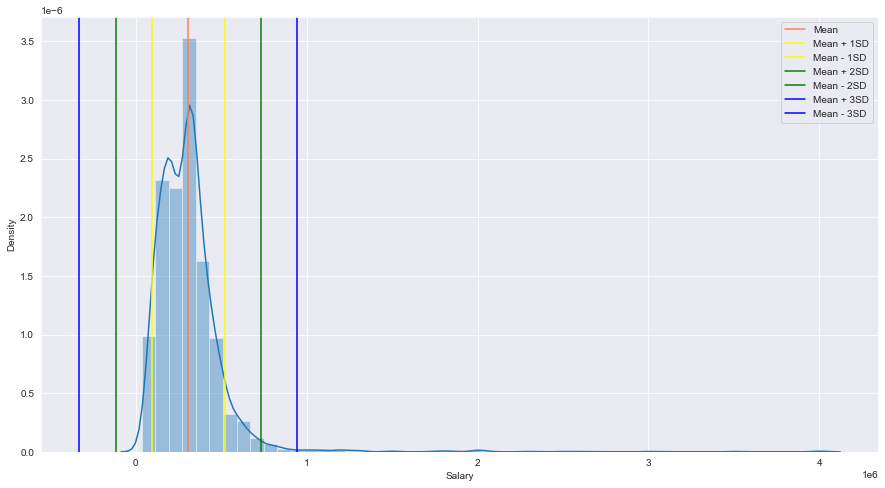

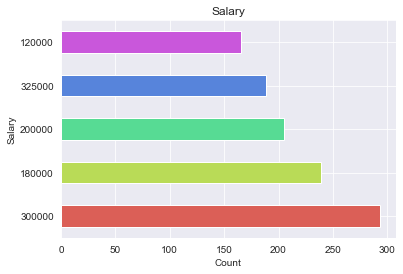

In [29]:
# probability and frequency distribution of salary using distplot
mu_normal = df['Salary'].mean()

sigma_normal = df['Salary'].std()

print('mean',mu_normal, 'standard deviation',sigma_normal)
one_std_right = mu_normal + (1 * sigma_normal)

one_std_left = mu_normal - (1 * sigma_normal)

two_std_right = mu_normal + (2 * sigma_normal)

two_std_left = mu_normal - (2 * sigma_normal)

three_std_right = mu_normal + (3 * sigma_normal)

three_std_left = mu_normal - (3 * sigma_normal)
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.distplot(df['Salary'])

plt.axvline(mu_normal, color='coral', label='Mean')

plt.axvline(one_std_right, color='yellow', label='Mean + 1SD')
plt.axvline(one_std_left, color='yellow', label='Mean - 1SD')
plt.axvline(two_std_right, color='green', label='Mean + 2SD')
plt.axvline(two_std_left, color='green', label='Mean - 2SD')
plt.axvline(three_std_right, color='blue', label='Mean + 3SD')
plt.axvline(three_std_left, color='blue', label='Mean - 3SD')
plt.legend();
plt.show()

# probability and frequency distribution of salary using barplot
df['Salary'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("Salary")
plt.xlabel("Count")
plt.title("Salary")
plt.show()

### Observation  
- From the distplot we can say that the distribution skewed towards the right i.e., it has positive skewness  
and have mean = 307699.8 and standard deviation = 212737.4.
- From the barplot, we can say that most of the people got salaries more than 3lakhs.

- 12percentage

mean 74.46636568284127 standard deviation 10.999933102957728


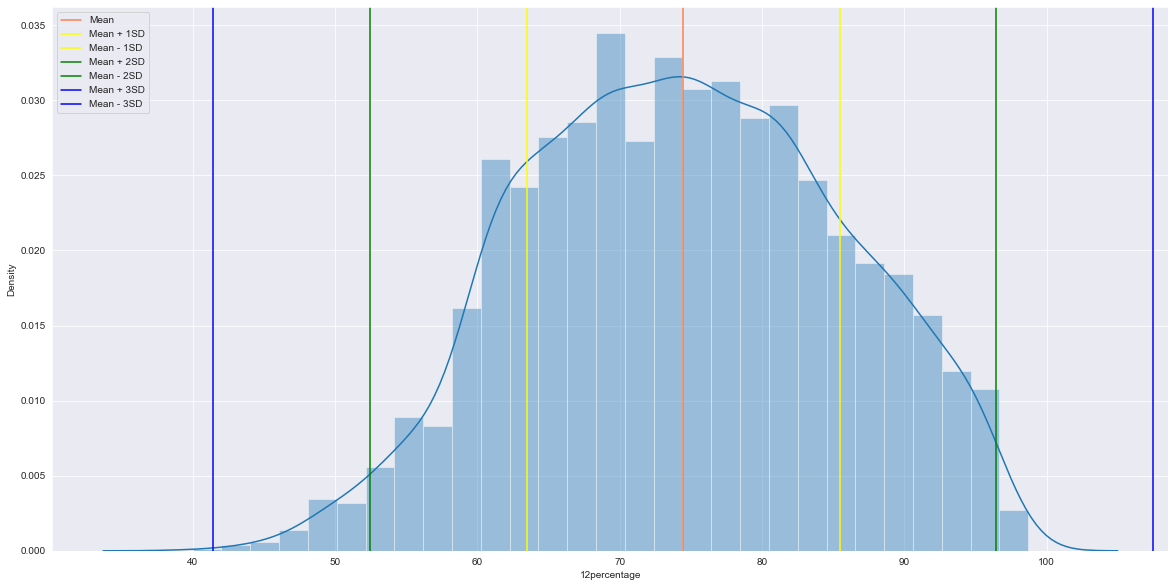

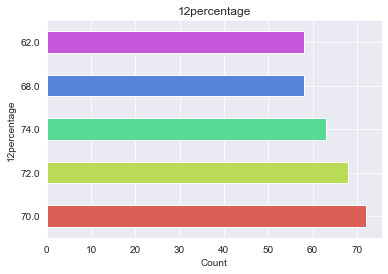

In [30]:
# probability and frequency distribution of 12percentage using distplot
mu_normal = df['12percentage'].mean()

sigma_normal = df['12percentage'].std()

print('mean',mu_normal, 'standard deviation',sigma_normal)
one_std_right = mu_normal + (1 * sigma_normal)

one_std_left = mu_normal - (1 * sigma_normal)

two_std_right = mu_normal + (2 * sigma_normal)

two_std_left = mu_normal - (2 * sigma_normal)

three_std_right = mu_normal + (3 * sigma_normal)

three_std_left = mu_normal - (3 * sigma_normal)
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
sns.distplot(df['12percentage'])

plt.axvline(mu_normal, color='coral', label='Mean')

plt.axvline(one_std_right, color='yellow', label='Mean + 1SD')
plt.axvline(one_std_left, color='yellow', label='Mean - 1SD')
plt.axvline(two_std_right, color='green', label='Mean + 2SD')
plt.axvline(two_std_left, color='green', label='Mean - 2SD')
plt.axvline(three_std_right, color='blue', label='Mean + 3SD')
plt.axvline(three_std_left, color='blue', label='Mean - 3SD')
plt.legend();
plt.show()

# probability and frequency distribution of 12percentage using barplot.
df['12percentage'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("12percentage")
plt.xlabel("Count")
plt.title("12percentage")
plt.show()

### Observation  
- From the distplot we can say that the distribution skewed towards the left i.e., it has negative skewness  
and have mean = 74.4% and standard deviation = 10.9.
- From the barplot, we can say that most of the people got their 12% more than 70.

- CollegeGPA

mean 71.48617058529268 standard deviation 8.167337651961981


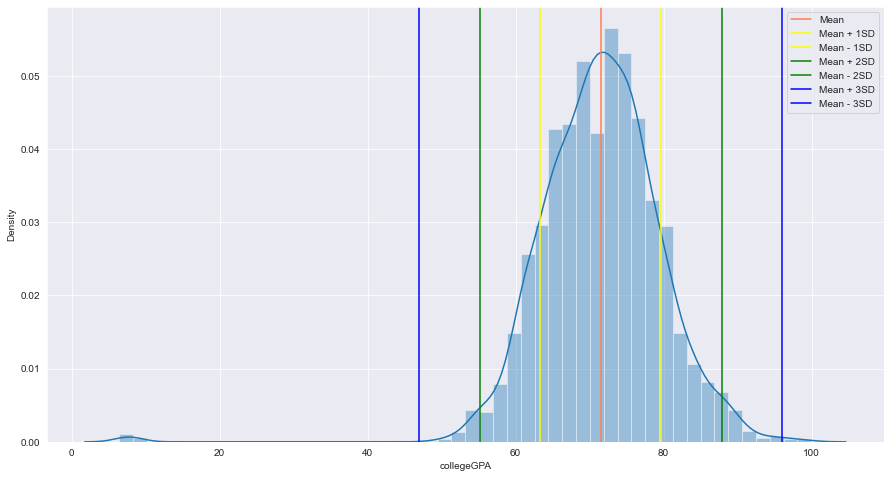

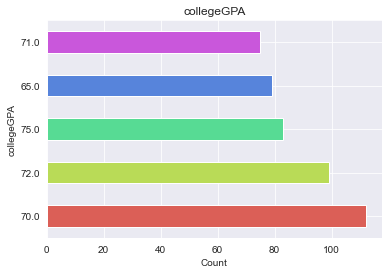

In [31]:
# probability and frequency distribution of collegeGPA using distplot.
mu_normal = df['collegeGPA'].mean()

sigma_normal = df['collegeGPA'].std()

print('mean',mu_normal, 'standard deviation',sigma_normal)
one_std_right = mu_normal + (1 * sigma_normal)

one_std_left = mu_normal - (1 * sigma_normal)

two_std_right = mu_normal + (2 * sigma_normal)

two_std_left = mu_normal - (2 * sigma_normal)

three_std_right = mu_normal + (3 * sigma_normal)

three_std_left = mu_normal - (3 * sigma_normal)
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.distplot(df['collegeGPA'])

plt.axvline(mu_normal, color='coral', label='Mean')

plt.axvline(one_std_right, color='yellow', label='Mean + 1SD')
plt.axvline(one_std_left, color='yellow', label='Mean - 1SD')
plt.axvline(two_std_right, color='green', label='Mean + 2SD')
plt.axvline(two_std_left, color='green', label='Mean - 2SD')
plt.axvline(three_std_right, color='blue', label='Mean + 3SD')
plt.axvline(three_std_left, color='blue', label='Mean - 3SD')
plt.legend();
plt.show()

# probability and frequency distribution of collegeGPA using barplot.
df['collegeGPA'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("collegeGPA")
plt.xlabel("Count")
plt.title("collegeGPA")
plt.show()

### Observation  
- From the distplot we can say that the distribution skewed towards the left i.e., it has negative skewness  
and have mean = 71.4 and standard deviation = 8.16.
- From the barplot, we can say that most of the people got their collegeGPA more than 70.

- Computer Programming

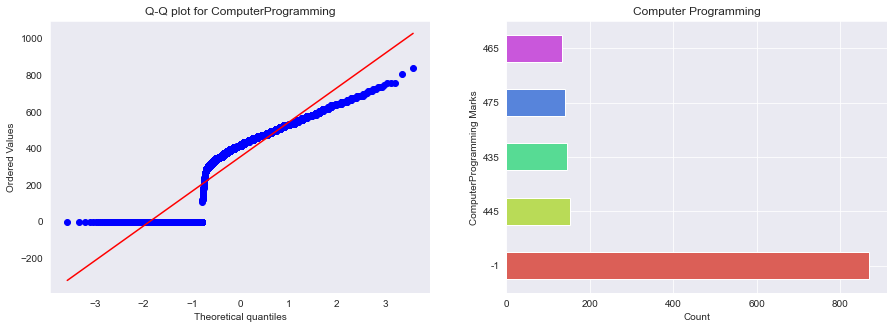

In [32]:
# Q-Qplot for Computer programming.
plt.figure(1,figsize=(15,5))
plt.subplot(121)
stats.probplot(df['ComputerProgramming'], dist="norm", plot=plt)
plt.title("Q-Q plot for ComputerProgramming")
plt.grid()

# Barplot for Computer programming.
plt.subplot(122)
df['ComputerProgramming'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("ComputerProgramming Marks")
plt.xlabel("Count")
plt.title("Computer Programming")
plt.show()

### Observation  
- From Q-Q plot for computer programming, we can say that there is a lot of discrepancy in the plot, as it is not normally distributed we can say that there ar outliers in the data.
- From barplot, we can say that most of them got negative marks.

- Domain

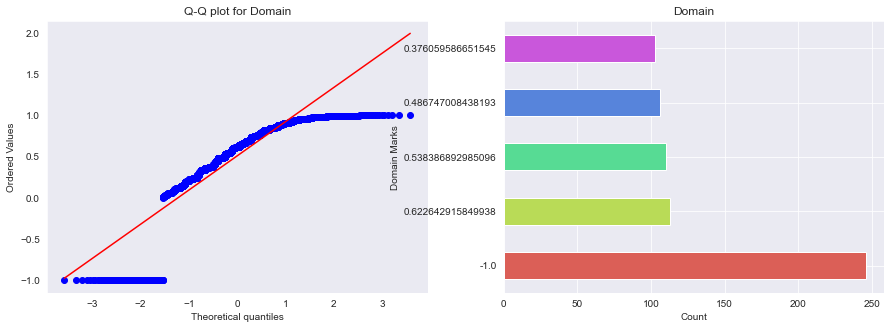

In [33]:
# Q-Qplot for Domain.
plt.figure(1,figsize=(15,5))
plt.subplot(121)
stats.probplot(df['Domain'], dist="norm", plot=plt)
plt.title("Q-Q plot for Domain")
plt.grid()

# Barplot for Domain.
plt.subplot(122)
df['Domain'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("Domain Marks")
plt.xlabel("Count")
plt.title("Domain")
plt.show()

#### Observation  
- From Q-Q plot, we can say that there is a lot of discrepency in the data, because of outliers it is not normally distributed.
- From the barplot we can say that most of them have their domain score as `-1.`

- Probability and frequency distribution for all the Engineering columns of their marks.

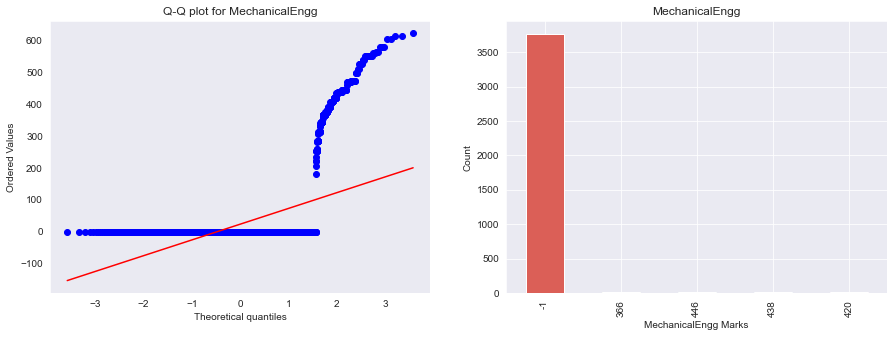

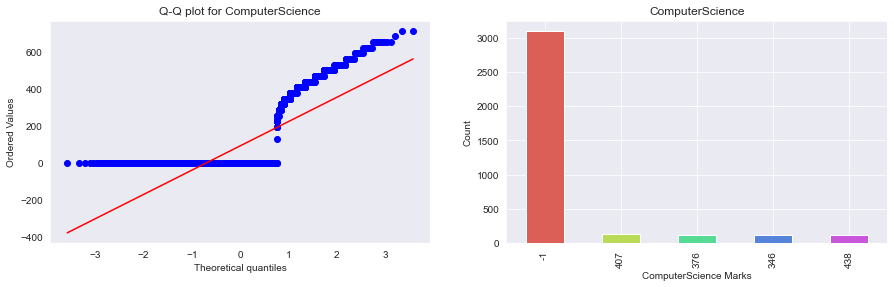

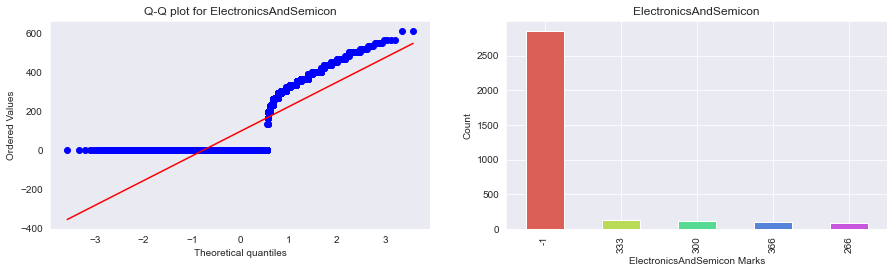

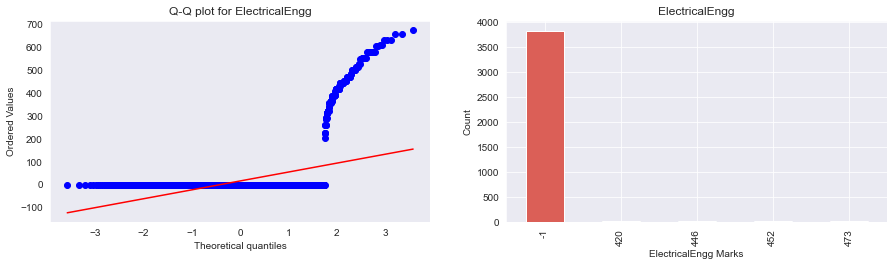

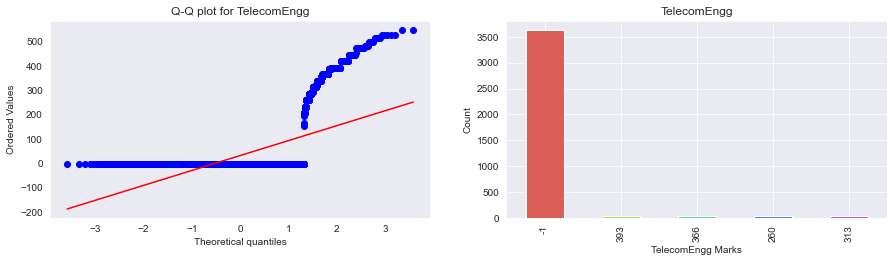

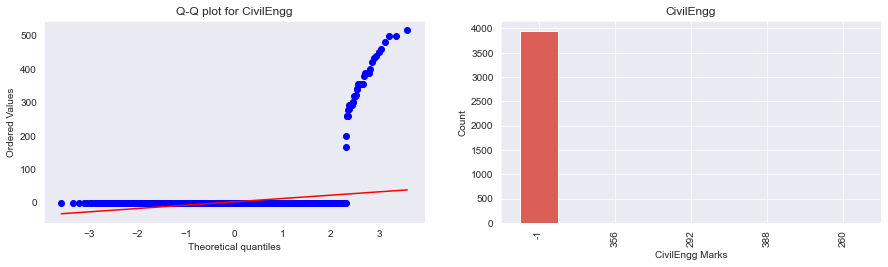

In [34]:
# Q-Qplot for Mechanical Engineering.
plt.figure(1,figsize=(15,5))
plt.subplot(121)
stats.probplot(df['MechanicalEngg'], dist="norm", plot=plt)
plt.title("Q-Q plot for MechanicalEngg")
plt.grid()
# Barplot for Mechanical Engineering.
plt.subplot(122)
df['MechanicalEngg'].value_counts().head().plot(kind = "bar", color = sns.color_palette("hls", 5))
plt.ylabel("Count")
plt.xlabel("MechanicalEngg Marks")
plt.title("MechanicalEngg")
plt.show()

# Q-Qplot for ComputerScience.
plt.figure(2,figsize=(15,9))
plt.subplot(221)
stats.probplot(df['ComputerScience'], dist="norm", plot=plt)
plt.title("Q-Q plot for ComputerScience")
plt.grid()
# Barplot for ComputerScience.
plt.subplot(222)
df['ComputerScience'].value_counts().head().plot(kind = "bar", color = sns.color_palette("hls", 5))
plt.ylabel("Count")
plt.xlabel("ComputerScience Marks")
plt.title("ComputerScience")
plt.show()

# Q-Qplot for ElectronicsAndSemicon.
plt.figure(3,figsize=(15,13))
plt.subplot(321)
stats.probplot(df['ElectronicsAndSemicon'], dist="norm", plot=plt)
plt.title("Q-Q plot for ElectronicsAndSemicon")
plt.grid()
# Barplot for ElectronicsAndSemicon Engineering.
plt.subplot(322)
df['ElectronicsAndSemicon'].value_counts().head().plot(kind = "bar", color = sns.color_palette("hls", 5))
plt.ylabel("Count")
plt.xlabel("ElectronicsAndSemicon Marks")
plt.title("ElectronicsAndSemicon")
plt.show()

# Q-Qplot for ElectricalEngg.
plt.figure(4,figsize=(15,17))
plt.subplot(421)
stats.probplot(df['ElectricalEngg'], dist="norm", plot=plt)
plt.title("Q-Q plot for ElectricalEngg")
plt.grid()
# Barplot for ElectricalEngg.
plt.subplot(422)
df['ElectricalEngg'].value_counts().head().plot(kind = "bar", color = sns.color_palette("hls", 5))
plt.ylabel("Count")
plt.xlabel("ElectricalEngg Marks")
plt.title("ElectricalEngg")
plt.show()

# Q-Qplot for TelecomEngg.
plt.figure(5,figsize=(15,21))
plt.subplot(521)
stats.probplot(df['TelecomEngg'], dist="norm", plot=plt)
plt.title("Q-Q plot for TelecomEngg")
plt.grid()
# Barplot for TelecomEngg.
plt.subplot(522)
df['TelecomEngg'].value_counts().head().plot(kind = "bar", color = sns.color_palette("hls", 5))
plt.ylabel("Count")
plt.xlabel("TelecomEngg Marks")
plt.title("TelecomEngg")
plt.show()

# Q-Qplot for CivilEngg.
plt.figure(6,figsize=(15,26))
plt.subplot(621)
stats.probplot(df['CivilEngg'], dist="norm", plot=plt)
plt.title("Q-Q plot for CivilEngg")
plt.grid()
# Barplot for CivilEngg.
plt.subplot(622)
df['CivilEngg'].value_counts().head().plot(kind = "bar", color = sns.color_palette("hls", 5))
plt.ylabel("Count")
plt.xlabel("CivilEngg Marks")
plt.title("CivilEngg")
plt.show()

#### Observation  
- From Q-Q plot we can say that all the columns which are taken into consideration are not normally distributed which means all the columns as outliers.
- From the barplot, we can see that most of them have got a score of `-1` in all the columns.

- Conscientiousness

mean -0.03783129064532285 standard deviation 1.0286656043404265


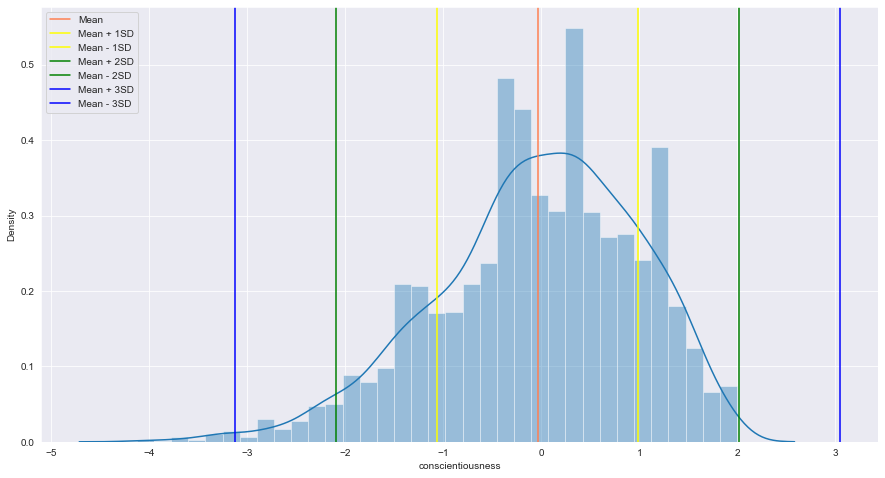

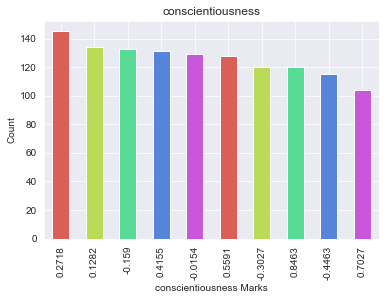

In [35]:
# probability and frequency distribution of conscientiousness using distplot.
mu_normal = df['conscientiousness'].mean()

sigma_normal = df['conscientiousness'].std()

print('mean',mu_normal, 'standard deviation',sigma_normal)
one_std_right = mu_normal + (1 * sigma_normal)

one_std_left = mu_normal - (1 * sigma_normal)

two_std_right = mu_normal + (2 * sigma_normal)

two_std_left = mu_normal - (2 * sigma_normal)

three_std_right = mu_normal + (3 * sigma_normal)

three_std_left = mu_normal - (3 * sigma_normal)
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.distplot(df['conscientiousness'])

plt.axvline(mu_normal, color='coral', label='Mean')

plt.axvline(one_std_right, color='yellow', label='Mean + 1SD')
plt.axvline(one_std_left, color='yellow', label='Mean - 1SD')
plt.axvline(two_std_right, color='green', label='Mean + 2SD')
plt.axvline(two_std_left, color='green', label='Mean - 2SD')
plt.axvline(three_std_right, color='blue', label='Mean + 3SD')
plt.axvline(three_std_left, color='blue', label='Mean - 3SD')
plt.legend();
plt.show()

# probability and frequency distribution of conscientiousness using barplot.
df['conscientiousness'].value_counts().head(10).plot(kind = "bar", color = sns.color_palette("hls", 5))
plt.ylabel("Count")
plt.xlabel("conscientiousness Marks")
plt.title("conscientiousness")
plt.show()

#### Observation  
- From the distplot, we can say that the distribution is skewed towards the left i.e., it is considered as negative skewness as outliers are present towards the left and mean = -0.03 and standard deviation = 1.02
- From the barplot we can say that most of them got marks of `0.2718`for conscientiousness.

- Agreeableness.

mean 0.14649582291145624 standard deviation 0.9417821625653949


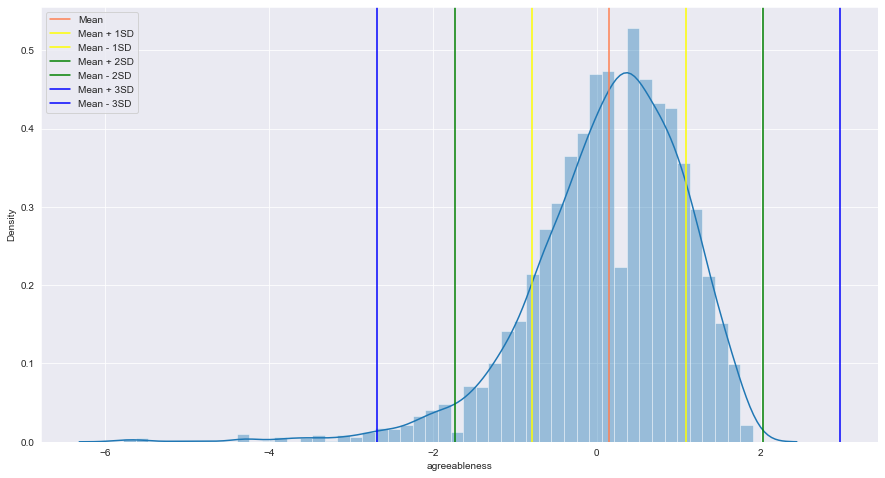

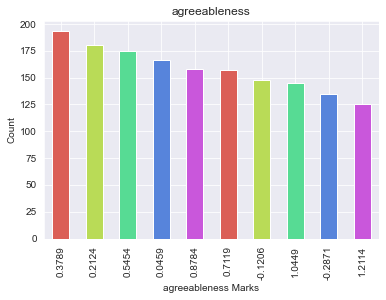

In [36]:
# probability and frequency distribution of agreeableness using distplot.
mu_normal = df['agreeableness'].mean()

sigma_normal = df['agreeableness'].std()

print('mean',mu_normal, 'standard deviation',sigma_normal)
one_std_right = mu_normal + (1 * sigma_normal)

one_std_left = mu_normal - (1 * sigma_normal)

two_std_right = mu_normal + (2 * sigma_normal)

two_std_left = mu_normal - (2 * sigma_normal)

three_std_right = mu_normal + (3 * sigma_normal)

three_std_left = mu_normal - (3 * sigma_normal)
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.distplot(df['agreeableness'])

plt.axvline(mu_normal, color='coral', label='Mean')

plt.axvline(one_std_right, color='yellow', label='Mean + 1SD')
plt.axvline(one_std_left, color='yellow', label='Mean - 1SD')
plt.axvline(two_std_right, color='green', label='Mean + 2SD')
plt.axvline(two_std_left, color='green', label='Mean - 2SD')
plt.axvline(three_std_right, color='blue', label='Mean + 3SD')
plt.axvline(three_std_left, color='blue', label='Mean - 3SD')
plt.legend();
plt.show()

# probability and frequency distribution of agreeableness using barplot.
df['agreeableness'].value_counts().head(10).plot(kind = "bar", color = sns.color_palette("hls", 5))
plt.ylabel("Count")
plt.xlabel("agreeableness Marks")
plt.title("agreeableness")
plt.show()

#### Observation  
- From the distplot, we can say that the distribution is skewed towards the left i.e., it is considered as negative skewness as outliers are present towards the left and mean = 0.14 and standard deviation = 0.94.
- From the plot we can say that most of them got marks of `0.3789`for agreeableness.

- Extraversion 

mean 0.0027629814907454133 standard deviation 0.951471442921609


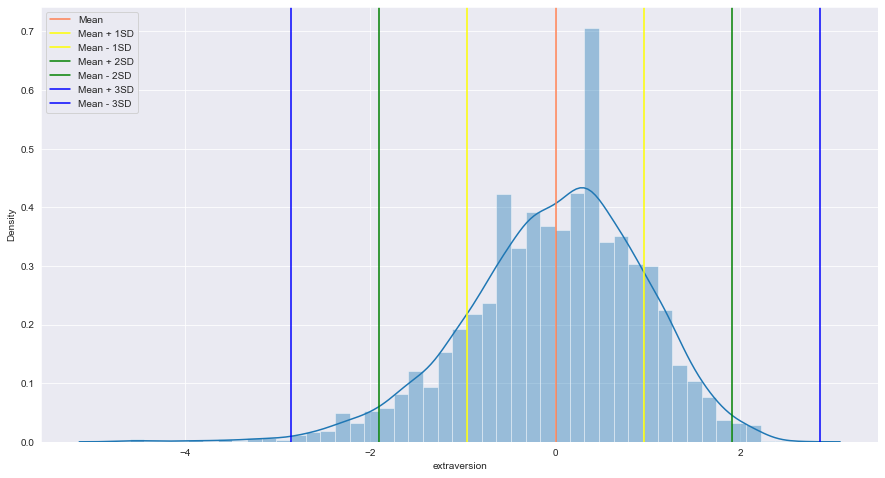

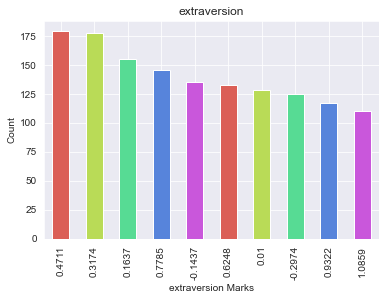

In [37]:
# probability and frequency distribution of extraversion using distplot.
mu_normal = df['extraversion'].mean()

sigma_normal = df['extraversion'].std()

print('mean',mu_normal, 'standard deviation',sigma_normal)
one_std_right = mu_normal + (1 * sigma_normal)

one_std_left = mu_normal - (1 * sigma_normal)

two_std_right = mu_normal + (2 * sigma_normal)

two_std_left = mu_normal - (2 * sigma_normal)

three_std_right = mu_normal + (3 * sigma_normal)

three_std_left = mu_normal - (3 * sigma_normal)
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.distplot(df['extraversion'])

plt.axvline(mu_normal, color='coral', label='Mean')

plt.axvline(one_std_right, color='yellow', label='Mean + 1SD')
plt.axvline(one_std_left, color='yellow', label='Mean - 1SD')
plt.axvline(two_std_right, color='green', label='Mean + 2SD')
plt.axvline(two_std_left, color='green', label='Mean - 2SD')
plt.axvline(three_std_right, color='blue', label='Mean + 3SD')
plt.axvline(three_std_left, color='blue', label='Mean - 3SD')
plt.legend();
plt.show()

# probability and frequency distribution of extraversion using barplot.
df['extraversion'].value_counts().head(10).plot(kind = "bar", color = sns.color_palette("hls", 5))
plt.ylabel("Count")
plt.xlabel("extraversion Marks")
plt.title("extraversion")
plt.show()

#### Observation  
- From the distplot, we can say that the distribution is skewed towards the left i.e., it is considered as negative skewness as outliers are present towards the left and mean = 0.002 and standard deviation = 0.95.
- From the plot we can say that most of them got marks of `0.4711 and 0.3174`for extraversion.

- Nueroticism

mean -0.16903257128564403 standard deviation 1.0075796250873494


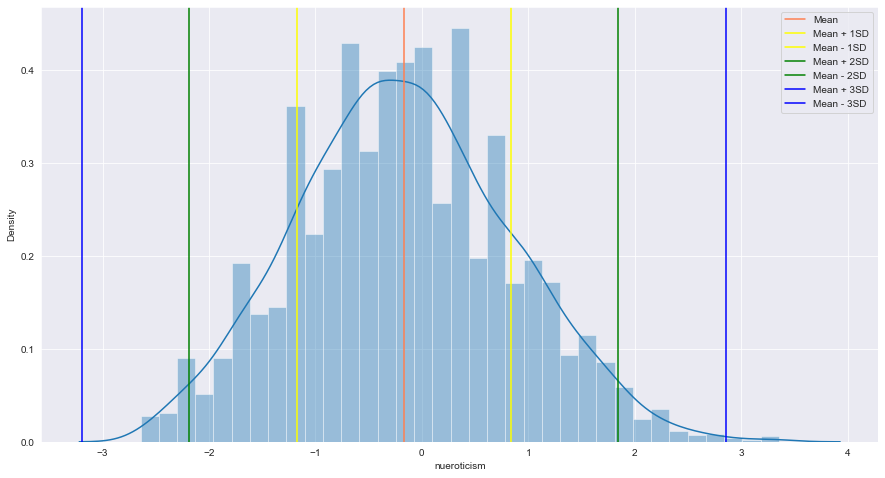

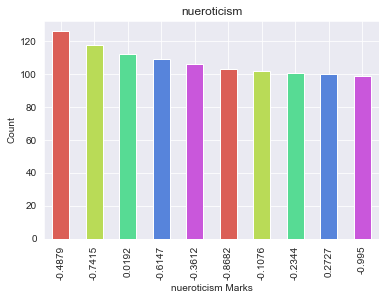

In [38]:
# probability and frequency distribution of nueroticism using distplot.
mu_normal = df['nueroticism'].mean()

sigma_normal = df['nueroticism'].std()

print('mean',mu_normal, 'standard deviation',sigma_normal)
one_std_right = mu_normal + (1 * sigma_normal)

one_std_left = mu_normal - (1 * sigma_normal)

two_std_right = mu_normal + (2 * sigma_normal)

two_std_left = mu_normal - (2 * sigma_normal)

three_std_right = mu_normal + (3 * sigma_normal)

three_std_left = mu_normal - (3 * sigma_normal)
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.distplot(df['nueroticism'])

plt.axvline(mu_normal, color='coral', label='Mean')

plt.axvline(one_std_right, color='yellow', label='Mean + 1SD')
plt.axvline(one_std_left, color='yellow', label='Mean - 1SD')
plt.axvline(two_std_right, color='green', label='Mean + 2SD')
plt.axvline(two_std_left, color='green', label='Mean - 2SD')
plt.axvline(three_std_right, color='blue', label='Mean + 3SD')
plt.axvline(three_std_left, color='blue', label='Mean - 3SD')
plt.legend();
plt.show()

# probability and frequency distribution of nueroticism using barplot.
df['nueroticism'].value_counts().head(10).plot(kind = "bar", color = sns.color_palette("hls", 5))
plt.ylabel("Count")
plt.xlabel("nueroticism Marks")
plt.title("nueroticism")
plt.show()

#### Observation  
- From the distplot, we can say that the distribution is skewed towards the right i.e., it is considered as positive skewness as outliers are present towards the right and mean = -0.16 and standard deviation = 1.
- From the barplot we can say that most of them got marks of `-0.4879`for neuroticism.

Openess to Experience.

mean -0.13811023011505627 standard deviation 1.008074562220052


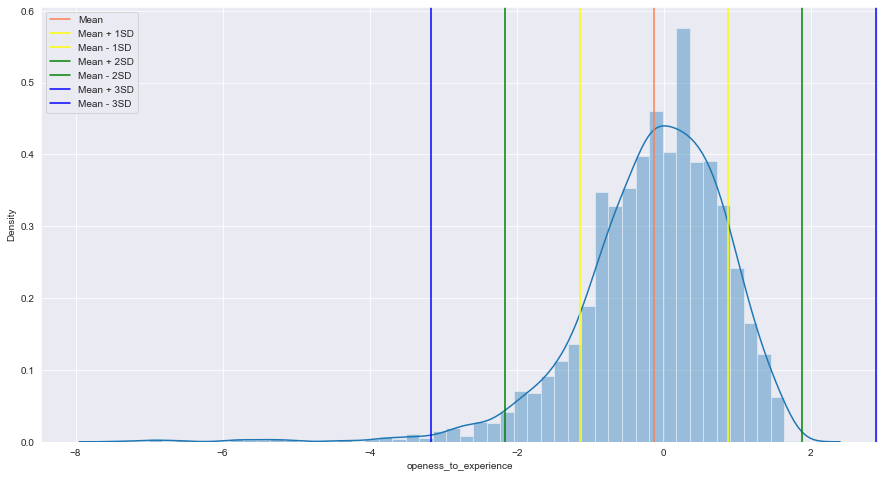

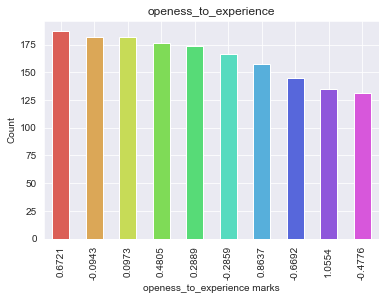

In [39]:
# probability and frequency distribution of openess_to_experience using distplot.
mu_normal = df['openess_to_experience'].mean()

sigma_normal = df['openess_to_experience'].std()

print('mean',mu_normal, 'standard deviation',sigma_normal)
one_std_right = mu_normal + (1 * sigma_normal)

one_std_left = mu_normal - (1 * sigma_normal)

two_std_right = mu_normal + (2 * sigma_normal)

two_std_left = mu_normal - (2 * sigma_normal)

three_std_right = mu_normal + (3 * sigma_normal)

three_std_left = mu_normal - (3 * sigma_normal)
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.distplot(df['openess_to_experience'])

plt.axvline(mu_normal, color='coral', label='Mean')

plt.axvline(one_std_right, color='yellow', label='Mean + 1SD')
plt.axvline(one_std_left, color='yellow', label='Mean - 1SD')
plt.axvline(two_std_right, color='green', label='Mean + 2SD')
plt.axvline(two_std_left, color='green', label='Mean - 2SD')
plt.axvline(three_std_right, color='blue', label='Mean + 3SD')
plt.axvline(three_std_left, color='blue', label='Mean - 3SD')
plt.legend();
plt.show()

# probability and frequency distribution of openess_to_experience using barplot.
df['openess_to_experience'].value_counts().head(10).plot(kind = "bar", color = sns.color_palette("hls", 11))
plt.ylabel("Count")
plt.xlabel("openess_to_experience marks")
plt.title("openess_to_experience")
plt.show()

#### Observation  
- From the distplot, we can say that the distribution is skewed towards the left i.e., it is considered as negative skewness as outliers are present towards the left and mean =-0.13 and standard deviation = 1.
- From the barplot we can say that most of them got marks of `0.6721`for openess to experience.

#### 3) Frequency distribution of each categorical Variable/Column.

In [40]:
categorical = df.select_dtypes(include=['object'])
categorical.head()

,Designation,JobCity,Gender,10board,12graduation,12board,CollegeTier,Degree,Specialization,CollegeCityTier,CollegeState,GraduationYear
0,senior quality engineer,Bangalore,f,"board ofsecondary education,ap",2007,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,0,Andhra Pradesh,2011
1,assistant manager,Indore,m,cbse,2007,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,Madhya Pradesh,2012
2,systems engineer,Chennai,f,cbse,2010,cbse,2,B.Tech/B.E.,information technology,0,Uttar Pradesh,2014
3,senior software engineer,Gurgaon,m,cbse,2007,cbse,1,B.Tech/B.E.,computer engineering,1,Delhi,2011
4,get,Manesar,m,cbse,2008,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,Uttar Pradesh,2012


- Degree.

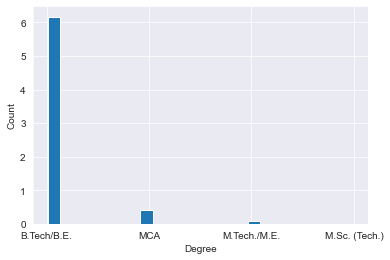

In [41]:
plt.hist(df.Degree, bins=20, rwidth=0.8, density=True)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

#### Observation  
From the histplot we can say that most of the people from AMCAT are from colleges offering courses for `B.Tech/B.E`.

- Gender.

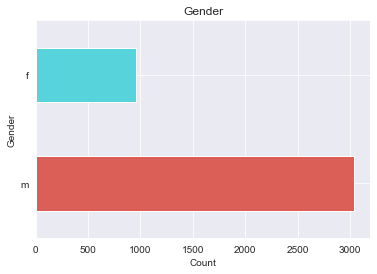

In [42]:
df['Gender'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 2))
plt.ylabel("Gender")
plt.xlabel("Count")
plt.title("Gender")
plt.show()

#### Observation  
From the barplot, we can say that male(m) proportion is more than the female(f) proportion.

- Designation.

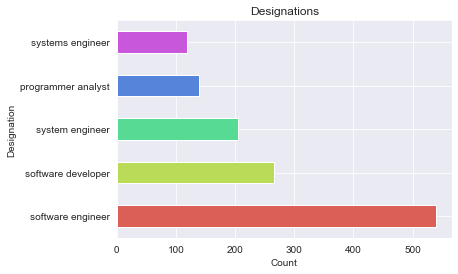

In [43]:
df['Designation'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("Designation")
plt.xlabel("Count")
plt.title("Designations")
plt.show()

#### Observation  
From the barplot, we can say that frequency of different designations and most of the students offered for the role of `Software Engineer.`

- College State

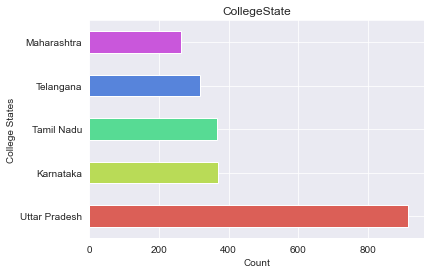

In [44]:
df['CollegeState'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("College States")
plt.xlabel("Count")
plt.title("CollegeState")
plt.show()

#### Observation  
From the plot we can say that most of the students applied are from `Uttar Pradesh.`

- Graduation Year

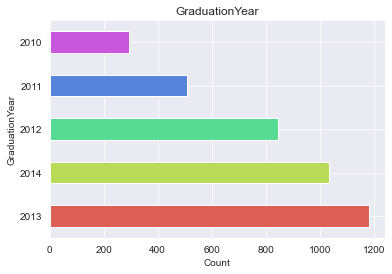

In [45]:
df['GraduationYear'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("GraduationYear")
plt.xlabel("Count")
plt.title("GraduationYear")
plt.show()

#### Observation  
Most of the students applied are graduated in the year of `2013`.

- College Tier

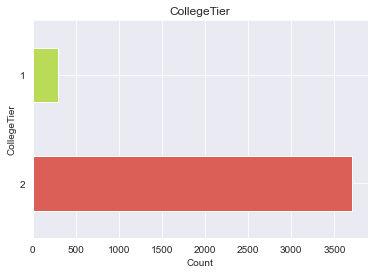

In [46]:
df['CollegeTier'].value_counts().head(3).plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("CollegeTier")
plt.xlabel("Count")
plt.title("CollegeTier")
plt.show()

#### Observation  
From the plot we can say that most of the students applied are not from Tier1 colleges.

- Job City

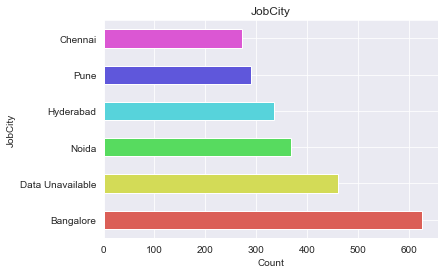

In [47]:
df['JobCity'].value_counts().head(6).plot(kind = "barh", color = sns.color_palette("hls", 6))
plt.ylabel("JobCity")
plt.xlabel("Count")
plt.title("JobCity")
plt.show()

#### Observation  
Most of the students are offered to join the job in the city of `Bangalore`.

- 10th Board.

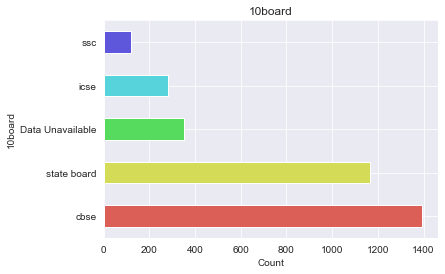

In [48]:
df['10board'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 6))
plt.ylabel("10board")
plt.xlabel("Count")
plt.title("10board")
plt.show()

#### Observation  
Most of the students are completed their Board of Secondary Education under `CBSE.`

- 12th Board.

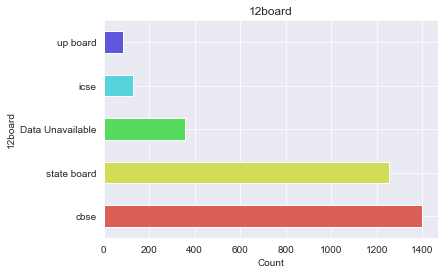

In [49]:
df['12board'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 6))
plt.ylabel("12board")
plt.xlabel("Count")
plt.title("12board")
plt.show()

#### Observation  
Most of the students are completed their Board of Intermediate Education under `CBSE.`

- 12th Graduation.

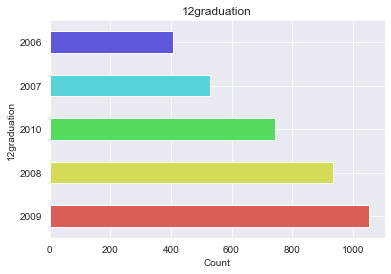

In [50]:
df['12graduation'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 6))
plt.ylabel("12graduation")
plt.xlabel("Count")
plt.title("12graduation")
plt.show()

#### Observation  
Most of the students completed their 12th graduation in the yeer of `2009`.

- Specialization.

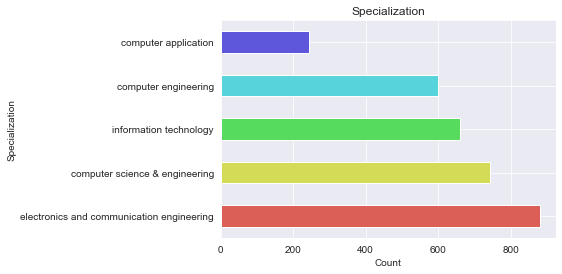

In [51]:
df['Specialization'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 6))
plt.ylabel("Specialization")
plt.xlabel("Count")
plt.title("Specialization")
plt.show()

#### Observation  
From the barplot, we can say that most of the people have completed their graduation in the branch of Electronics and Communication Engineering.

### Step4 - Bivariate Analysis

#### 1) The relationship between different numerical columns.

- CollegeGPA and 12percentage.

<AxesSubplot:xlabel='collegeGPA', ylabel='12percentage'>

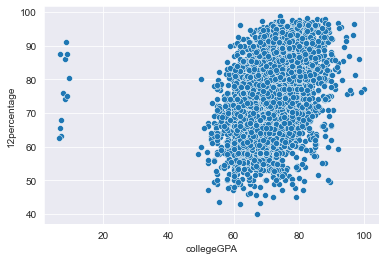

In [52]:
sns.scatterplot(x = 'collegeGPA',y= '12percentage',data=df)

#### Observation  
From scatterplot we can say that most of the people have got their 12percentage and collegeGPA between 60% to 80% and the data has outliers because most of them have mentioned their collegeGPA in percentage form and very less people mentioned in GPA.

- CollegeGPA and Salary

In [53]:
cs = pd.pivot_table(df, index =['collegeGPA','Salary'])
cs.head(10)

,,10percentage,12percentage,CivilEngg,ComputerProgramming,ComputerScience,Domain,ElectricalEngg,ElectronicsAndSemicon,English,Logical,MechanicalEngg,Quant,TelecomEngg,agreeableness,conscientiousness,extraversion,nueroticism,openess_to_experience
collegeGPA,Salary,,,,,,,,,,,,,,,,,,
6.45,250000,63.20,62.60,-1.0,-1.0,-1.0,0.824666,-1.0,400.0,505.0,575.0,-1.0,435.0,420.0,1.1248,-1.3447,0.6720,1.5899,-0.2875
6.63,195000,79.60,87.58,-1.0,285.0,284.0,0.144790,-1.0,-1.0,380.0,355.0,-1.0,210.0,-1.0,0.7119,0.8463,0.4711,1.1601,0.4805
6.80,180000,66.50,65.50,-1.0,-1.0,-1.0,-1.000000,-1.0,300.0,465.0,475.0,-1.0,565.0,-1.0,-0.2793,0.5100,-1.0697,0.1798,-1.0774
6.85,180000,58.90,68.00,-1.0,445.0,376.0,0.486747,-1.0,-1.0,490.0,310.0,-1.0,380.0,-1.0,0.2124,1.8517,0.6248,-1.7556,-0.4776
6.95,145000,61.30,63.00,-1.0,445.0,-1.0,0.635979,-1.0,-1.0,465.0,485.0,-1.0,565.0,-1.0,0.6568,-1.0355,0.9623,1.4724,0.8183
7.56,180000,69.00,76.00,-1.0,-1.0,-1.0,0.755375,-1.0,-1.0,380.0,475.0,446.0,605.0,-1.0,-0.9531,1.9953,-1.6807,-0.8682,-0.8608
8.07,360000,73.06,74.00,260.0,125.0,-1.0,0.694479,-1.0,366.0,375.0,245.0,473.0,295.0,-1.0,-2.3073,-2.7357,-0.7794,0.4148,-1.5513
8.13,240000,94.40,86.00,-1.0,-1.0,-1.0,0.459016,-1.0,-1.0,535.0,630.0,376.0,545.0,-1.0,-0.6201,0.4155,0.0100,-0.6147,-0.4776
8.58,400000,92.00,91.00,-1.0,-1.0,-1.0,0.829585,-1.0,-1.0,545.0,555.0,469.0,590.0,-1.0,1.2114,-0.0154,0.0100,0.1459,1.2470


#### Observation  
From athe above analysis, we can say that college percentage is not an important criteria for salary, it is all about your skills.

#### 2) The relationship between categorical and numerical columns.

- Gender and College(GPA)

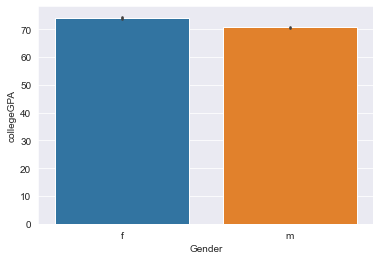

In [54]:
sns.barplot(x='Gender', y='collegeGPA', data=df)
plt.show()

#### Observation  
From the plot we can see that highest percentage is achieved by females.

- Gender and Salary

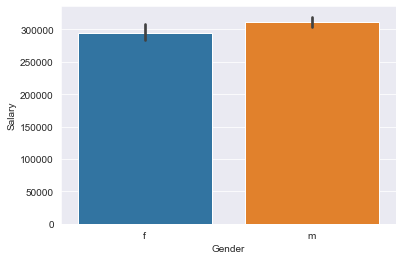

In [55]:
sns.barplot(x='Gender', y='Salary', data=df)
plt.show()

#### Observation  
From the plot we can see salary is given more to males when compared to females.

- College Tier and Salary

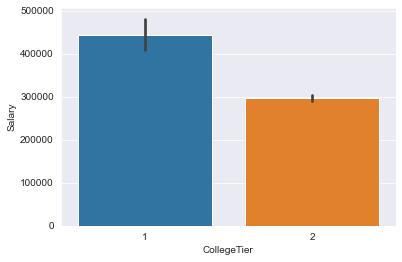

In [56]:
sns.barplot(x='CollegeTier', y='Salary', data=df)
plt.show()

#### Observation  
From the plot we can see that Tier1 colleges will get more salary when compared to non-tier colleges.

- Graduation Year and Salary

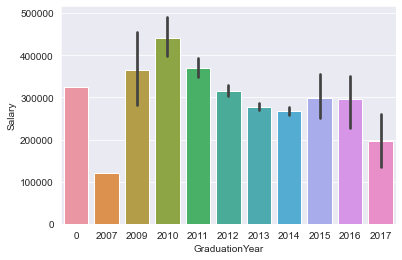

In [57]:
sns.barplot(x='GraduationYear', y='Salary', data=df)
plt.show()

#### Observation  
From the barplot, we can see that 2010 graduated students are given more salary when compared to other students.

- 12 Graduation year and their aggregates

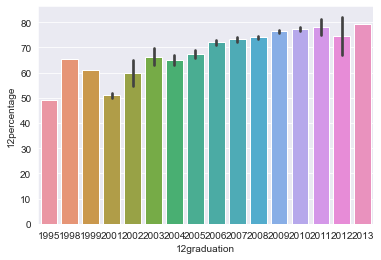

In [58]:
sns.barplot(x='12graduation', y='12percentage', data=df)
plt.show()

#### Observation  
From the plot we can say that 2011 and 2013 batches have more percentage when compared to other batches.

- College State and Designations

In [59]:
rest_fi = pd.crosstab(df["CollegeState"],df["Designation"],margins=True)
rest_fi.head()

Designation,.net developer,.net web developer,account executive,account manager,admin assistant,administrative coordinator,administrative support,aircraft technician,android developer,application developer,...,visiting faculty,web application developer,web designer,web designer and joomla administrator,web designer and seo,web developer,web intern,website developer/tester,windows systems administrator,All
CollegeState,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,2,0,0,0,0,0,0,0,0,2,...,0,0,1,0,0,5,0,0,0,225
Assam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
Bihar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
Chhattisgarh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
Delhi,1,0,0,0,0,0,0,0,3,2,...,0,0,0,0,0,1,0,0,0,162


#### Observation  
From analysis we can see that number of people with their job positions and the overall number of people in several states.

- Designation Data according to Salary, Job City, Graduation Year, collegeGPA and CollegeTier.

In [60]:
impute_grps = df.pivot_table(values=["Salary"], index=["Designation","JobCity","GraduationYear","collegeGPA","CollegeTier"], aggfunc=np.mean)
impute_grps
impute_grps.head(10)

Salary
Designation    JobCity          GraduationYear collegeGPA CollegeTier        
.net developer Ahmedabad        2014           73.00      2            200000
               Bangalore        2010           65.70      2            470000
                                2012           62.00      2            200000
                                               68.23      2             95000
                                2014           71.54      2            320000
               Bhilai           2013           76.61      2            240000
               Chennai          2010           78.56      2            450000
                                2013           77.07      2            315000
                                2014           67.00      2            120000
               Data Unavailable 2013           58.25      2            145000

#### Observation  
From the analysis, we can see how the salary is varying according to designation, job city, graduation year, collegeGPA and college Tier.

- Designation Data according to Salary,Job City and Graduation Year.

In [61]:
impute_grps = df.pivot_table(values=["Salary"], index=["Designation","JobCity","GraduationYear"], aggfunc=np.mean)
impute_grps
impute_grps.head(10)

Salary
Designation    JobCity          GraduationYear               
.net developer Ahmedabad        2014            200000.000000
               Bangalore        2010            470000.000000
                                2012            147500.000000
                                2014            320000.000000
               Bhilai           2013            240000.000000
               Chennai          2010            450000.000000
                                2013            315000.000000
                                2014            120000.000000
               Data Unavailable 2013            168333.333333
               Gurgaon          2015            350000.000000

#### Observation  
From the analysis, we can see how the salary is varying according to designation, job city and graduation year.

#### Chi Square Test of Independence.

In [13]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

#### 1) Is the preference of Designation depend on Gender.

Lets make a bold Claim that Gender and Designation are dependent.

Step - 1:
- Alternate Hypothesis(Bold Claim):$$ H_1: They \ are \ Dependent $$ 
- Null Hypothesis:$$ H_0: They \ are \ Independent $$

Step - 2:

Collect the sample of size n  
Compute the sample frequencies  

Step - 3: Compute $ \chi^2 $ test statistic
Now you need to check, if the difference in the observed and expected frequencies is too extreme to reject the NULL hypothesis.

Have a look at Observed Frequencies (in the sample)
Compute the Expected Frequencies (under null hyp assumption)$$ Expected \ Value = \frac{row \ total * col \ total}{grand \ total}$$Now, test statistic can be computed using below mentioned formula:$$ \chi^2 = \Sigma \frac{(o-e)^2}{e} $$

Step - 4: Decide $ \alpha $ and $ df = (rows-1)(cols-1) $

Step - 5: Apply decision rule

Chi Square Test$$ if \ \chi^2 > \chi^2_{df, \alpha} \Rightarrow Reject H_0 $$
p-value Test$$ p \ value = (1.0 - cdf(test \ statistic)) $$Now,$$ if (p \ value > \alpha) \Rightarrow Accept H_1 \ or \ Reject H_0 $$

In [14]:
df.Gender.value_counts()

m    3041
f     957
Name: Gender, dtype: int64

In [15]:
df.Designation.value_counts()

software engineer                      539
software developer                     265
system engineer                        205
programmer analyst                     139
systems engineer                       118
                                      ... 
assistant system engineer - trainee      1
full-time loss prevention associate      1
sales support                            1
seo analyst                              1
website developer/tester                 1
Name: Designation, Length: 419, dtype: int64

- Count of Male and Female for a particular Designation. 

In [16]:
pd.crosstab(df.Designation, df.Gender, margins=True)

Gender,f,m,All
Designation,,,
.net developer,8,26,34
.net web developer,1,3,4
account executive,2,2,4
account manager,0,1,1
admin assistant,0,2,2
...,...,...,...
web developer,17,37,54
web intern,1,0,1
website developer/tester,0,1,1


#### Observation  
From the above analysis, we can say that male population is more than the females.

In [17]:
observed = pd.crosstab(df.Designation, df.Gender)
observed

Gender,f,m
Designation,,
.net developer,8,26
.net web developer,1,3
account executive,2,2
account manager,0,1
admin assistant,0,2
...,...,...
web designer and seo,1,0
web developer,17,37
web intern,1,0


#### Observation  
From the above analysis we can say the number of people divided by gender with respect to designation.

In [18]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies
chi2_contingency(observed)

(526.8691881586136,
 0.00022988162224264305,
 418,
 array([[8.13856928e+00, 2.58614307e+01],
        [9.57478739e-01, 3.04252126e+00],
        [9.57478739e-01, 3.04252126e+00],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [2.39369685e-01, 7.60630315e-01],
        [2.39369685e-01, 7.60630315e-01],
        [2.39369685e-01, 7.60630315e-01],
        [1.10110055e+01, 3.49889945e+01],
        [1.24472236e+01, 3.95527764e+01],
        [5.26613307e+00, 1.67338669e+01],
        [7.18109055e-01, 2.28189095e+00],
        [7.18109055e-01, 2.28189095e+00],
        [6.22361181e+00, 1.97763882e+01],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [9.57478739e-01, 3.04252126e+00],
        [1.24472236e+01, 3.95527764e+01],
        [2.87243622e+00, 9.12756378e+00],
        [7.18109055e-01, 2.28189095e+00],
        [7.18109055e-01, 2.28189095e+00],
        [4.78739370e-01, 1.52126063e+00],
        [5.50550275e+00, 

In [19]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df = chi2_contingency(observed)[2]

In [20]:
print("The value of Chi-Square Test Statistic is:",chi2_test_stat)
print("p-value:",pval)
print("Degrees of Freedom:",df)

The value of Chi-Square Test Statistic is: 526.8691881586136
p-value: 0.00022988162224264305
Degrees of Freedom: 418


#### Observation  
- The value of Chi-Square Test Statistic is: 526.8691881586136
- p-value: 0.00022988162224264305
- Degrees of Freedom: 418

In [21]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, df)

print("Chi-Square Critical Value:",chi2_critical)

Chi-Square Critical Value: 455.45617411672214


#### Observation  
The value of Chi-square critical is 455.5.

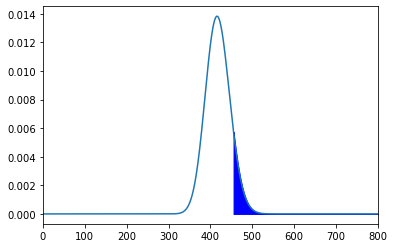

In [22]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 800

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 800)
y = chi2.pdf(x, df)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 800)
y1 = chi2.pdf(x1, df)
plt.fill_between(x1, y1, color='blue')

In [23]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [24]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


#### Observation  
As Null Hypothesis is rejected, accept Alternate Hypothesis.  

#### 2) Does the preference of Specialization depend on Gender.

Lets make a bold Claim that Gender and Specialization are dependent.

Step - 1:
- Alternate Hypothesis(Bold Claim):$$ H_1: They \ are \ Dependent $$ 
- Null Hypothesis:$$ H_0: They \ are \ Independent $$

Step - 2:

Collect the sample of size n  
Compute the sample frequencies  

Step - 3: Compute $ \chi^2 $ test statistic
Now you need to check, if the difference in the observed and expected frequencies is too extreme to reject the NULL hypothesis.

Have a look at Observed Frequencies (in the sample)
Compute the Expected Frequencies (under null hyp assumption)$$ Expected \ Value = \frac{row \ total * col \ total}{grand \ total}$$Now, test statistic can be computed using below mentioned formula:$$ \chi^2 = \Sigma \frac{(o-e)^2}{e} $$

Step - 4: Decide $ \alpha $ and $ df = (rows-1)(cols-1) $

Step - 5: Apply decision rule

Chi Square Test$$ if \ \chi^2 > \chi^2_{df, \alpha} \Rightarrow Reject H_0 $$
p-value Test$$ p \ value = (1.0 - cdf(test \ statistic)) $$Now,$$ if (p \ value > \alpha) \Rightarrow Accept H_1 \ or \ Reject H_0 $$

In [14]:
df.Specialization.value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
information science engineering                 27
electronics and instrumentation engineering     27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
chemical engineering                             9
applied electronics and instrum

In [16]:
df.Gender.value_counts()

m    3041
f     957
Name: Gender, dtype: int64

In [17]:
# Step - 2 => Looking at the freqency distribution

pd.crosstab(df.Specialization, df.Gender, margins=True)

Gender,f,m,All
Specialization,,,
aeronautical engineering,1,2,3
applied electronics and instrumentation,2,7,9
automobile/automotive engineering,0,5,5
biomedical engineering,2,0,2
biotechnology,9,6,15
ceramic engineering,0,1,1
chemical engineering,1,8,9
civil engineering,6,23,29
computer and communication engineering,0,1,1


In [18]:
# These are the observed frequencies

observed = pd.crosstab(df.Specialization, df.Gender)
observed

Gender,f,m
Specialization,,
aeronautical engineering,1,2
applied electronics and instrumentation,2,7
automobile/automotive engineering,0,5
biomedical engineering,2,0
biotechnology,9,6
ceramic engineering,0,1
chemical engineering,1,8
civil engineering,6,23
computer and communication engineering,0,1


In [19]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

chi2_contingency(observed)

(104.46891913608454,
 1.2453868176977011e-06,
 45,
 array([[7.18109055e-01, 2.28189095e+00],
        [2.15432716e+00, 6.84567284e+00],
        [1.19684842e+00, 3.80315158e+00],
        [4.78739370e-01, 1.52126063e+00],
        [3.59054527e+00, 1.14094547e+01],
        [2.39369685e-01, 7.60630315e-01],
        [2.15432716e+00, 6.84567284e+00],
        [6.94172086e+00, 2.20582791e+01],
        [2.39369685e-01, 7.60630315e-01],
        [5.84062031e+01, 1.85593797e+02],
        [1.43621811e+02, 4.56378189e+02],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.78091046e+02, 5.65908954e+02],
        [1.43621811e+00, 4.56378189e+00],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.96283142e+01, 6.23716858e+01],
        [2.39369685e-01, 7.60630315e-01],
        [7.65982991e+00, 2.43401701e+01],
        [2.89637319e+01, 9.20362681e+01],
        [2.10645323e+02, 6.69354677e+02],
        [7.18109055e-01, 

In [20]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df = chi2_contingency(observed)[2]

In [21]:
print("Chi Square Test Statistic:",chi2_test_stat)
print("p-value:",pval)
print("Degrees of freedom:",df)

Chi Square Test Statistic: 104.46891913608454
p-value: 1.2453868176977011e-06
Degrees of freedom: 45


In [22]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, df)

print("Chi-Square Critical Value:",chi2_critical)

Chi-Square Critical Value: 57.50530474499599


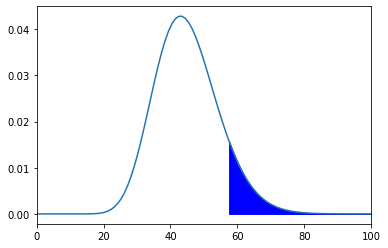

In [23]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 100

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, df)
plt.fill_between(x1, y1, color='blue')

In [24]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [25]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


#### Observation  
As Null Hypothesis is rejected, accept Alternate Hypothesis.

### Step5 - Conclusion

- After completion of EDA, we can easily see that there is huge amount of data which is misleading us in the form of outliers for example, when we consider collegeGPA column most of them have mentioned their percentages as they should mentioned in the form of GPA. So, it is necessary to remove outliers in the data.
- The data released by Aspiring Minds regarding Employment Outcome 2015 have shown that every organizations first priority is knowledge and skills.

### Step6 - Feature Transformation 

- Feature transformation involves mapping a set of values for the feature to a new set of values to make the representation of the data more suitable or easier to process for the downstream analysis. A common feature transformation operation is scaling. This involves changing the range of values for a feature of features to another specified range. This is done to avoid allowing features with large values to dominate the analysis results.
- There is a general process for preparing your data for Machine Learning.Part of this process includes data transformations like scaling and/or standardization. Very generally, Machine Learning models may perform better when feature distributions are approximately normal and when feature scales are similar.

- Among all the different methods of feature transformation and scaling techniques, the most used techniques are MinMax Scaler(Data Normalization) and Standard Scaler(Data Standardization).

- For Numerical Features -> Column Standardization

In [63]:
numerical = df.select_dtypes(include=['int64', 'float64'])
numerical.head()

,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,84.3,95.8,78.00,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,85.4,85.0,70.06,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,85.0,68.2,70.00,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,85.6,83.6,74.64,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,78.0,76.8,73.90,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


##### Data Standardization or Standard Scaler:
- In this process, scaling can be performed by transforming the features such that the results have zero mean, and unit standard deviation. 
- The steps to perform the scaling is to first calculate the mean and standard deviation values for the feature to be scaled. Then for each value, for this feature, subtract the mean value from that value, and divide by the standard deviation. 
- The transformed feature will end up with a mean value of zero, and standard deviation of one. This effectively removes the units of the features and converts each future value to number of standard deviations away from the mean. 
- This scaling method is used when the min and max values are known. This is also useful when there are outliers which will skew the calculation for the range as the max value is determined by the furthest outlier. This scaling operation is often referred to as zero-normalization or as standardization.

In [64]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(numerical), 
                      columns = numerical.columns)
df_num.head()

,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,0.527947,0.647233,1.939676,0.797646,0.127240,0.961148,0.095037,0.267789,0.447559,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.983466,0.707581,0.550939,1.512658,-0.304966
1,0.904045,0.758921,0.957729,-0.174641,1.842720,1.249258,2.180295,0.960524,-1.724556,2.342739,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.676367,0.246801,1.300083,0.060978,0.993910
2,0.081332,0.718307,-0.569744,-0.181988,1.080285,0.500173,-1.172473,-0.127212,0.204048,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.301041,1.661318,0.169167,-0.693995,0.803821
3,3.724775,0.779227,0.830439,0.386200,1.270894,0.961148,0.912785,0.989957,1.275495,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.081894,0.210589,-0.364495,-0.237001,-0.775129
4,-0.506320,0.007570,0.212176,0.295584,0.413154,1.422124,-0.395612,-0.823681,-1.724556,0.870120,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.819775,-0.452174,-1.127304,0.258734,0.008542


- For Categorical -> if more than 2 categories, use dummy variables. Otherwise convert the feature to Binary.


In [65]:
categorical_data = df.select_dtypes(include=['object'])
categorical_data.head()

,Designation,JobCity,Gender,10board,12graduation,12board,CollegeTier,Degree,Specialization,CollegeCityTier,CollegeState,GraduationYear
0,senior quality engineer,Bangalore,f,"board ofsecondary education,ap",2007,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,0,Andhra Pradesh,2011
1,assistant manager,Indore,m,cbse,2007,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,Madhya Pradesh,2012
2,systems engineer,Chennai,f,cbse,2010,cbse,2,B.Tech/B.E.,information technology,0,Uttar Pradesh,2014
3,senior software engineer,Gurgaon,m,cbse,2007,cbse,1,B.Tech/B.E.,computer engineering,1,Delhi,2011
4,get,Manesar,m,cbse,2008,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,Uttar Pradesh,2012


#### One Hot Encoding
- One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. The categorical value represents the numerical value of the entry in the dataset.
- With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector. 0 indicates non existent while 1 indicates existent.

In [59]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

df_cat = pd.DataFrame(encoder.fit_transform(categorical_data), 
                      columns=encoder.get_feature_names(categorical_data.columns))

df_cat.head()

,Designation_.net web developer,Designation_account executive,Designation_account manager,Designation_admin assistant,Designation_administrative coordinator,Designation_administrative support,Designation_aircraft technician,Designation_android developer,Designation_application developer,Designation_application engineer,...,GraduationYear_2007,GraduationYear_2009,GraduationYear_2010,GraduationYear_2011,GraduationYear_2012,GraduationYear_2013,GraduationYear_2014,GraduationYear_2015,GraduationYear_2016,GraduationYear_2017
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [60]:
amcat = pd.concat([df_num, df_cat], axis=1)
amcat.head()

,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,...,GraduationYear_2007,GraduationYear_2009,GraduationYear_2010,GraduationYear_2011,GraduationYear_2012,GraduationYear_2013,GraduationYear_2014,GraduationYear_2015,GraduationYear_2016,GraduationYear_2017
0,0.527947,0.647233,1.939676,0.797646,0.127240,0.961148,0.095037,0.267789,0.447559,-0.608820,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.904045,0.758921,0.957729,-0.174641,1.842720,1.249258,2.180295,0.960524,-1.724556,2.342739,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.081332,0.718307,-0.569744,-0.181988,1.080285,0.500173,-1.172473,-0.127212,0.204048,-0.608820,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3.724775,0.779227,0.830439,0.386200,1.270894,0.961148,0.912785,0.989957,1.275495,-0.608820,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.506320,0.007570,0.212176,0.295584,0.413154,1.422124,-0.395612,-0.823681,-1.724556,0.870120,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
